# PPwang's Blog Post
> "Test"

- toc:true- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- author: PPwang

In [528]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

# COL1 = 2020 USA's daily Cases
# COL21 =month;     COL22 = top10 countries
# COL3 = 2020 USA's death

In [529]:
df=pd.read_csv('covid.csv')
df.head(5)

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,31,12,2019,0,0,Afghanistan,AFG,38041757,Asia,0.0
1,31,12,2019,0,0,Algeria,DZA,43053054,Africa,0.0
2,31,12,2019,0,0,Armenia,ARM,2957728,Europe,0.0
3,31,12,2019,0,0,Australia,AUS,25203200,Oceania,0.0
4,31,12,2019,0,0,Austria,AUT,8858775,Europe,0.0


I combine Date.Day, Date.Month, Date.Year into new column **Date (ex: 2019/12/31)**

In [530]:
df1 = df.copy()  
df['Date.Year']= df1['Date.Year'].astype(str)  
df['Date.Month']= df1['Date.Month'].astype(str)  
df['Date.Day']= df1['Date.Day'].astype(str)  
df.insert(3, column="Date", value=(df['Date.Year']+'/'+df['Date.Month']+'/'+df['Date.Day']))
df

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,31,12,2019,2019/12/31,0,0,Afghanistan,AFG,38041757,Asia,0.000000
1,31,12,2019,2019/12/31,0,0,Algeria,DZA,43053054,Africa,0.000000
2,31,12,2019,2019/12/31,0,0,Armenia,ARM,2957728,Europe,0.000000
3,31,12,2019,2019/12/31,0,0,Australia,AUS,25203200,Oceania,0.000000
4,31,12,2019,2019/12/31,0,0,Austria,AUT,8858775,Europe,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
53624,10,12,2020,2020/12/10,202,16,Afghanistan,AFG,38041757,Asia,6.968658
53625,11,12,2020,2020/12/11,63,10,Afghanistan,AFG,38041757,Asia,7.134266
53626,12,12,2020,2020/12/12,113,11,Afghanistan,AFG,38041757,Asia,6.868768
53627,13,12,2020,2020/12/13,298,9,Afghanistan,AFG,38041757,Asia,7.052776


In [531]:
df

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,31,12,2019,2019/12/31,0,0,Afghanistan,AFG,38041757,Asia,0.000000
1,31,12,2019,2019/12/31,0,0,Algeria,DZA,43053054,Africa,0.000000
2,31,12,2019,2019/12/31,0,0,Armenia,ARM,2957728,Europe,0.000000
3,31,12,2019,2019/12/31,0,0,Australia,AUS,25203200,Oceania,0.000000
4,31,12,2019,2019/12/31,0,0,Austria,AUT,8858775,Europe,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
53624,10,12,2020,2020/12/10,202,16,Afghanistan,AFG,38041757,Asia,6.968658
53625,11,12,2020,2020/12/11,63,10,Afghanistan,AFG,38041757,Asia,7.134266
53626,12,12,2020,2020/12/12,113,11,Afghanistan,AFG,38041757,Asia,6.868768
53627,13,12,2020,2020/12/13,298,9,Afghanistan,AFG,38041757,Asia,7.052776


# I choose only **USA(df3)** to do analysis

In [532]:
df3=df.loc[df['Location.Country']=='United_States_of_America']
df3

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
65,31,12,2019,2019/12/31,0,0,United_States_of_America,USA,329064917,America,0.000000
132,1,1,2020,2020/1/1,0,0,United_States_of_America,USA,329064917,America,0.000000
199,2,1,2020,2020/1/2,0,0,United_States_of_America,USA,329064917,America,0.000000
266,3,1,2020,2020/1/3,0,0,United_States_of_America,USA,329064917,America,0.000000
333,4,1,2020,2020/1/4,0,0,United_States_of_America,USA,329064917,America,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
52732,1,11,2020,2020/11/1,78934,848,United_States_of_America,USA,329064917,America,309.850412
52944,2,11,2020,2020/11/2,81001,440,United_States_of_America,USA,329064917,America,319.926843
53156,3,11,2020,2020/11/3,83883,555,United_States_of_America,USA,329064917,America,327.136059
53368,4,11,2020,2020/11/4,92734,1076,United_States_of_America,USA,329064917,America,337.524586


It's my first time to complet **my Date column**, so I decide to draw my own picture!!!!

Text(0.5, 1.0, '2021 USA daily patients curve')

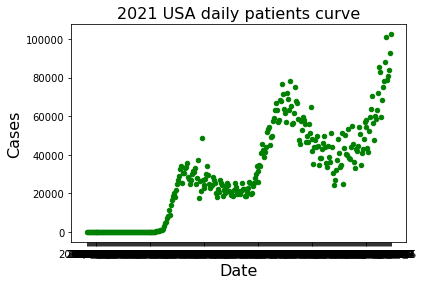

In [533]:
date=df3.plot.scatter(x='Date', y='Data.Cases',color='green')
date.set_xlabel('Date',fontsize=16)
date.set_ylabel('Cases',fontsize=16)
date.set_title('2021 USA daily patients curve',fontsize=16)

# Calculate USA ***mean***, ***median***, ***mode*** 

**Mean**

In [534]:
COL1_Mean=round(df3['Data.Cases'].mean(),2)
COL1_Mean

30503.17

**Median**

In [535]:
COL1_Median=round(df3['Data.Cases'].median(),2)
COL1_Median

27762.0

**Mode**

In [536]:
COL1_Mode=round(df3['Data.Cases'].mode(),2)
COL1_Mode

0    0
dtype: int64

Calculate USA trimmed_mean, and the ***n= 10% = 0.1*** because the pandemic happened in USA after 2022.Feb.

**But I prefer only cut the top but keep the bottom**

In [537]:
COL1_trim_mean=round(trim_mean(df3['Data.Cases'],0.1),2)
COL1_trim_mean

28757.84

In [538]:
casesrange = pd.cut(df['Data.Cases'], 100)
print(casesrange.value_counts())

(-507.24, 600.44]        45462
(600.44, 1708.12]         4234
(1708.12, 2815.8]         1176
(2815.8, 3923.48]          620
(3923.48, 5031.16]         451
                         ...  
(-3830.28, -2722.6]          0
(-4937.96, -3830.28]         0
(98076.28, 99183.96]         0
(99183.96, 100291.64]        0
(-6045.64, -4937.96]         0
Name: Data.Cases, Length: 100, dtype: int64


sort of Data cases ASEC

In [539]:
df4 = pd.concat([df, casesrange], axis=1)
df4 = df3.sort_values(by='Data.Cases')
df4

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
65,31,12,2019,2019/12/31,0,0,United_States_of_America,USA,329064917,America,0.000000
1665,24,1,2020,2020/1/24,0,0,United_States_of_America,USA,329064917,America,0.000304
3876,26,2,2020,2020/2/26,0,0,United_States_of_America,USA,329064917,America,0.012156
1799,26,1,2020,2020/1/26,0,0,United_States_of_America,USA,329064917,America,0.000608
3742,24,2,2020,2020/2/24,0,0,United_States_of_America,USA,329064917,America,0.006990
...,...,...,...,...,...,...,...,...,...,...,...
51040,24,10,2020,2020/10/24,85329,953,United_States_of_America,USA,329064917,America,251.923848
52308,30,10,2020,2020/10/30,88130,968,United_States_of_America,USA,329064917,America,293.640844
53368,4,11,2020,2020/11/4,92734,1076,United_States_of_America,USA,329064917,America,337.524586
52520,31,10,2020,2020/10/31,101273,1040,United_States_of_America,USA,329064917,America,303.066644


# COL1 Histogram

**Mode <median < trimmed mean < mean**

It represents a right-skewed distribution, which has a peak to the left of the distribution and data values that taper off to the right. This distribution has a single peak and is also unimodal. For a histogram that is skewed to the right, the mean is located to the right on the distribution and is the largest value of the measures of central tendency. The mean has the largest value because it is strongly affected by the outliers on the right tail that pull the mean to the right. The mode is the smallest value, and it is located to the left on the distribution. The mode always occurs at the highest point of the peak. The median is located between the mode and the mean.

In [540]:
# How to mark more beautiful? Need more time to review it.

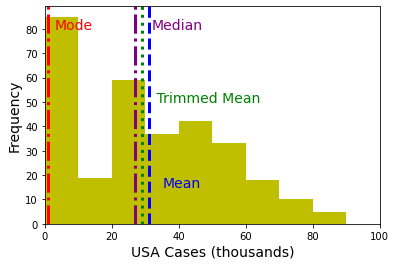

In [541]:
ax = (df3['Data.Cases'] / 1000).plot.hist(xlim=[0, 100], 
                                    bins=range(0,100,10), figsize=(6, 4), color='y')
ax.set_xlabel('USA Cases (thousands)',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)
plt.text(3,80,'Mode',fontsize=14, color='red')
plt.text(32,80,'Median',fontsize=14, color='purple')
plt.text(32,50,' Trimmed Mean',fontsize=14, color='green')
plt.text(35,15,'Mean',fontsize=14, color='blue')
ax.axvline(1,color='r',linestyle='dashdot', lw=3)
ax.axvline(27,color='purple',linestyle='dashdot', lw=3)
ax.axvline(29,color='green',linestyle='dotted', lw=3)
ax.axvline(31,color='blue',linestyle='--', lw=3)